In [1]:
!pip install pycaret pandas

In [ ]:
from pycaret.regression import RegressionExperiment
import pandas as pd
data = pd.read_csv(r'dataforecast\last_test.csv') # นำเข้าเองfilepath ของ last test
data['timestamp'] = pd.to_datetime(data['timestamp'])
print(data.dtypes)
data

timestamp      datetime64[ns]
humidity              float64
pm_2_5                float64
temperature           float64
dtype: object


,timestamp,humidity,pm_2_5,temperature
0,2021-08-18 00:00:00,82.810924,6.478261,27.261345
1,2021-08-18 01:00:00,84.977966,14.271186,26.650000
2,2021-08-18 02:00:00,84.600000,32.308333,26.710924
3,2021-08-18 03:00:00,85.113559,29.743590,26.647458
4,2021-08-18 04:00:00,85.430833,38.931034,26.551667
...,...,...,...,...
25531,2025-02-03 19:00:00,70.578723,28.591667,29.206171
25532,2025-02-03 20:00:00,69.189982,29.714286,28.579493
25533,2025-02-03 21:00:00,72.229974,22.954545,27.387404
25534,2025-02-03 22:00:00,74.487035,21.478992,26.806460


In [22]:
s = RegressionExperiment()
s.setup(data, target = 'pm_2_5', session_id = 123) # ตั้งค่า setup parameter

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(25536, 4)"
4,Transformed data shape,"(25536, 6)"
5,Transformed train set shape,"(17875, 6)"
6,Transformed test set shape,"(7661, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


In [23]:
best_model = s.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.0190,51.1015,7.1452,0.7069,0.3972,0.4617,0.3180
rf,Random Forest Regressor,5.5529,58.3505,7.6354,0.6653,0.4312,0.5537,0.5460
lightgbm,Light Gradient Boosting Machine,6.5093,72.2608,8.4994,0.5855,0.4909,1.0128,0.0840
knn,K Neighbors Regressor,6.4075,76.0746,8.7173,0.5636,0.4809,0.6203,0.0170
gbr,Gradient Boosting Regressor,7.9047,102.9344,10.1444,0.4096,0.5720,1.7676,0.2400
dt,Decision Tree Regressor,7.0886,106.1076,10.2943,0.3913,0.5554,0.5880,0.0180
ada,AdaBoost Regressor,9.4727,132.3729,11.5043,0.2409,0.6822,2.8292,0.0790
lar,Least Angle Regression,9.4344,136.8953,11.6983,0.2151,0.6641,2.9480,0.0110
br,Bayesian Ridge,9.4350,136.8955,11.6983,0.2151,0.6641,2.9486,0.0120
ridge,Ridge Regression,9.4344,136.8953,11.6983,0.2151,0.6641,2.9480,0.0110


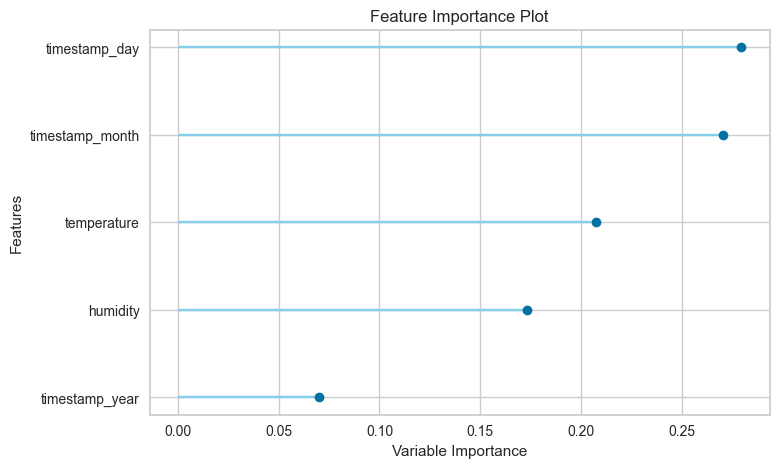

In [5]:
s.plot_model(best_model,plot = "feature")

In [6]:
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
predict_test_data =  s.predict_model(best_model)
predict_test_data

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.9137,48.6463,6.9747,0.7293,0.3912,0.5051


,timestamp,humidity,temperature,pm_2_5,prediction_label
24154,2024-12-05 10:00:00,91.153580,25.988838,49.308334,55.683587
3134,2022-04-10 14:00:00,83.742844,28.054708,21.138710,21.138710
1091,2021-10-17 11:00:00,76.608887,29.959999,9.471358,16.730355
12019,2023-05-27 19:00:00,100.000000,29.512606,9.747899,15.223160
18044,2024-03-08 20:00:00,66.669739,30.807867,31.094828,37.325440
...,...,...,...,...,...
20723,2024-07-08 11:00:00,67.829231,31.275221,13.341666,9.205314
12480,2023-06-16 00:00:00,100.000000,28.018908,16.067226,23.610898
23506,2024-11-04 10:00:00,86.567444,26.978313,13.108334,14.331544
10760,2023-04-05 08:00:00,100.000000,28.176250,43.825001,39.214330


In [8]:
print("predict testset")
predict_test_data[['pm_2_5','prediction_label']] # predict testset

predict testset


,pm_2_5,prediction_label
24154,49.308334,55.683587
3134,21.138710,21.138710
1091,9.471358,16.730355
12019,9.747899,15.223160
18044,31.094828,37.325440
...,...,...
20723,13.341666,9.205314
12480,16.067226,23.610898
23506,13.108334,14.331544
10760,43.825001,39.214330


In [9]:
new_data = data.copy().drop(['pm_2_5'], axis=1)
predictions = s.predict_model(best_model,data = new_data)
print("****predict_alldata****")
predictions

****predict_alldata****


,timestamp,humidity,temperature,prediction_label
0,2021-08-18 00:00:00,82.810921,27.261345,6.478261
1,2021-08-18 01:00:00,84.977966,26.650000,14.271187
2,2021-08-18 02:00:00,84.599998,26.710924,32.308334
3,2021-08-18 03:00:00,85.113556,26.647457,29.743589
4,2021-08-18 04:00:00,85.430832,26.551666,38.931034
...,...,...,...,...
25531,2025-02-03 19:00:00,70.578720,29.206171,28.591667
25532,2025-02-03 20:00:00,69.189980,28.579493,29.714285
25533,2025-02-03 21:00:00,72.229973,27.387405,22.954546
25534,2025-02-03 22:00:00,74.487038,26.806459,21.478992


<Figure size 2000x600 with 0 Axes>

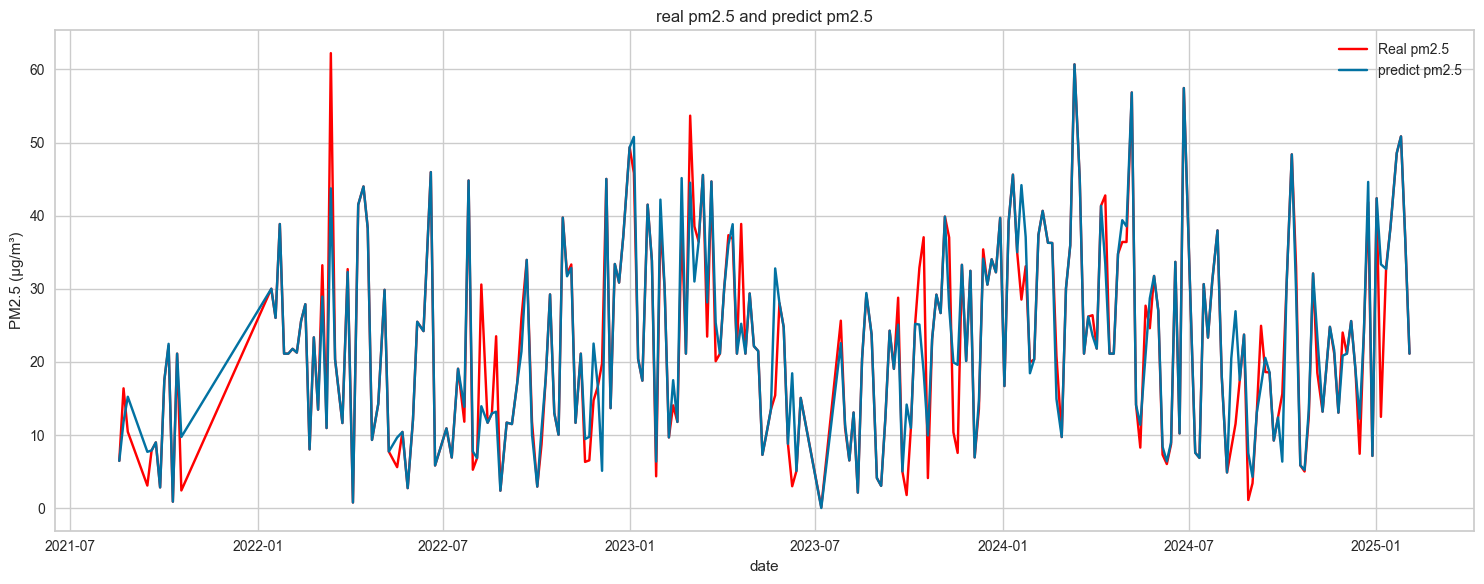

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sample_rate = 100  # แสดงทุกๆ 10 จุด


plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'][::100], data['pm_2_5'][::100], label='Real pm2.5', color = 'red')
plt.plot(data['timestamp'][::100], predictions['prediction_label'][::100], label='predict pm2.5', marker='x')
plt.title('real pm2.5 and predict pm2.5')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
s.save_model(best_model, r'models\best_model') # ส่งเอง filepath เอง

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'C:\\Users\\ASUS\\Desktop\\projectforecastpm2_5\\models\\best_model.pkl')

In [ ]:
from pycaret.regression import load_model, predict_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

file_path = r"dataforecast\last_test.csv" # นำเข้าเอง
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Load the trained model
model = load_model(r'models\best_model') # นำเข้าเอง
np.random.seed(42)

def forecast_next_7_days(model, last_data, external_data):
    last_date = last_data['timestamp'].max()
    future_hours = [last_date + timedelta(hours=i+1) for i in range(7 * 24)]  # 7 days * 24 hours
    future_data = [] # store future data
    current_data = last_data.copy()
    
    for future_hour in future_hours:
        new_row = {'timestamp': future_hour}
        
        # ใช้ค่า temperature และ humidity จาก external_data
        if future_hour in external_data['timestamp'].values:
            matched_row = external_data[external_data['timestamp'] == future_hour].iloc[0]
            new_row['temperature'] = matched_row['temperature']
            new_row['humidity'] = matched_row['humidity']
        else:
            new_row['temperature'] = current_data['temperature'].iloc[-1]  # ใช้ค่าล่าสุดที่มี
            new_row['humidity'] = current_data['humidity'].iloc[-1]
        
        
        # Predict PM2.5 for this hour
        new_df = pd.DataFrame([new_row])
        prediction = predict_model(model, data=new_df)
        new_row['pm_2_5'] = prediction['prediction_label'].iloc[0]
        future_data.append(new_row)
        
        # Add predicted data to current_data for next hour prediction
        current_data = pd.concat([current_data, pd.DataFrame([new_row])], ignore_index=True)
    
    return pd.DataFrame(future_data)

# โหลด external data ที่มีค่า temperature และ humidity
external_file_path = r"dataforecast\cleandata_hours.csv" # นำเข้าเอง
external_data = pd.read_csv(external_file_path)
external_data['timestamp'] = pd.to_datetime(external_data['timestamp'])

# Generate forecast data
forecast_data = forecast_next_7_days(model, df, external_data)
forecast_data

Transformation Pipeline and Model Successfully Loaded


,timestamp,temperature,humidity,pm_2_5
0,2025-02-04 00:00:00,25.794946,75.480921,28.011134
1,2025-02-04 01:00:00,25.554351,75.151995,29.576622
2,2025-02-04 02:00:00,24.923516,77.632531,32.700578
3,2025-02-04 03:00:00,24.127439,81.569758,41.216277
4,2025-02-04 04:00:00,23.320383,86.182408,48.989312
...,...,...,...,...
163,2025-02-10 19:00:00,28.891425,69.219469,31.983810
164,2025-02-10 20:00:00,28.379455,70.651656,31.069454
165,2025-02-10 21:00:00,27.974364,71.649910,29.748705
166,2025-02-10 22:00:00,27.943536,71.973936,29.126937


<Figure size 2000x600 with 0 Axes>

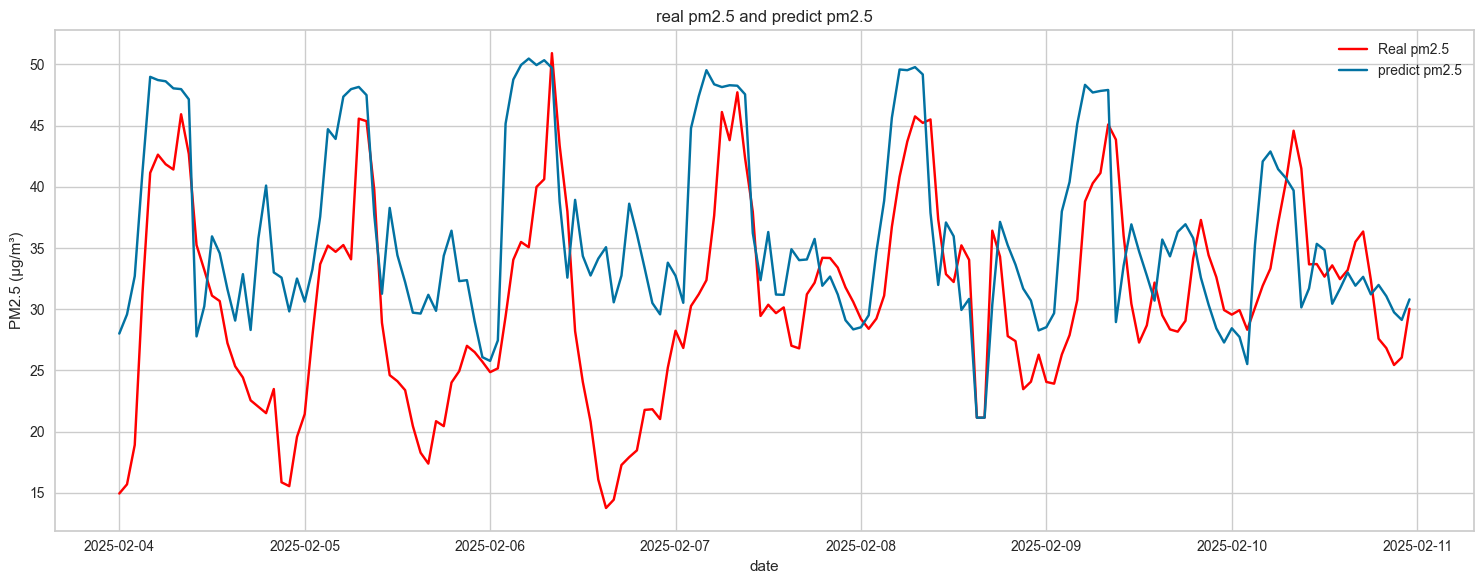

In [ ]:
import matplotlib.pyplot as plt
data2 = pd.read_csv(r'dataforecast\cleandata_hours.csv') # นำเข้าเอง
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

plt.figure(figsize=(20, 6))
# sample_rate = 100  # แสดงทุกๆ 10 จุด
data2 = data2.iloc[-168:].copy()
data2 = data2.reset_index(drop=True)
plt.figure(figsize=(15, 6))
plt.plot(data2['timestamp'], data2['pm_2_5'], label='Real pm2.5', color = 'red')
plt.plot(forecast_data['timestamp'], forecast_data['pm_2_5'], label='predict pm2.5', marker='x')
plt.title('real pm2.5 and predict pm2.5')
plt.xlabel('date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# สมมติว่าเรามีค่าจริง (actual_values) สำหรับช่วงเวลาที่ทำนาย
actual_values = data2['pm_2_5']  # ค่าจริงของ PM2.5 สำหรับ 7 วันข้างหน้า
predicted_values = forecast_data['pm_2_5']  # ค่าที่ทำนายได้จากโมเดล

# คำนวณ MAE
mae = mean_absolute_error(actual_values, predicted_values)

# คำนวณ MSE
mse = mean_squared_error(actual_values, predicted_values)

# คำนวณ RMSE
rmse = np.sqrt(mse)

# คำนวณ R2
r2 = r2_score(actual_values, predicted_values)

# คำนวณ MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_values, predicted_values)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}%")

MAE: 6.91230675041547
MSE: 71.65982554056485
RMSE: 8.465212669541437
R2: -0.13236925504904207
MAPE: 26.801345836844643%
